Section 1: Machine learning project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')

In [ ]:
pip install fredapi

In [3]:
from fredapi import Fred

In [5]:
pd.set_option('display.max_columns',500)

In [7]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [9]:
fred_key = '3bda4eb03ed7e29f7c885fbe1dd2ee95'

#fred_key = https://api.stlouisfed.org/fred/series/search?api_key=3bda4eb03ed7e29f7c885fbe1dd2ee95&search_text=canada


In [11]:
fred = Fred(api_key=fred_key)

In [13]:
sp_search = fred.search('S&P',order_by = 'popularity')

In [14]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-01-02,2025-01-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-12-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-31 08:06:08-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-01-02,2025-01-02,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-12-31 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-01-02,2025-01-02,S&P 500,2015-01-02,2024-12-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-12-31 19:12:00-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-01-02,2025-01-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-12-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-31 08:06:11-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-01-02,2025-01-02,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-12-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-31 08:13:07-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-01-02,2025-01-02,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-01-02,2025-01-02,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-01-02,2025-01-02,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


In [17]:
# Pull Raw Data

In [19]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

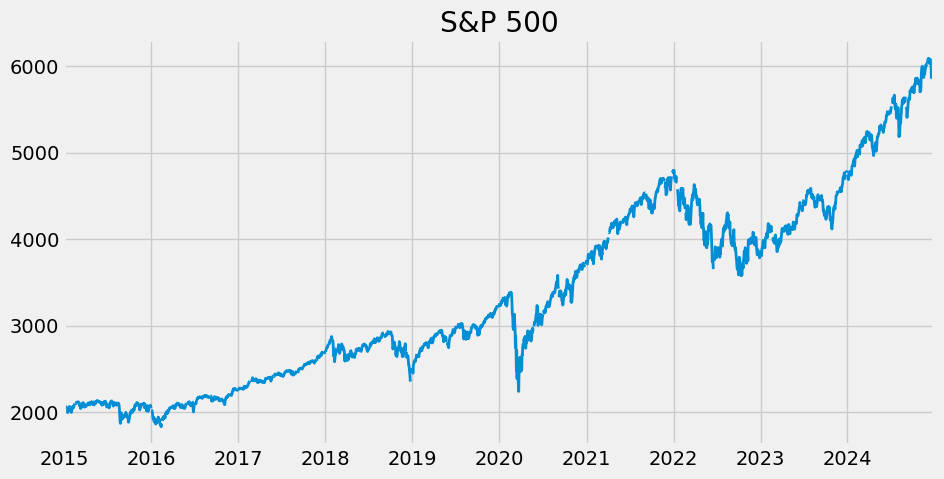

In [21]:
sp500.plot(figsize=(10,5),title='S&P 500',lw=2)

In [99]:
unemp_results = fred.search('unemployment')
unrate = fred.get_series('UNRATE')

<Axes: title={'center': 'Unemployment Rate'}>

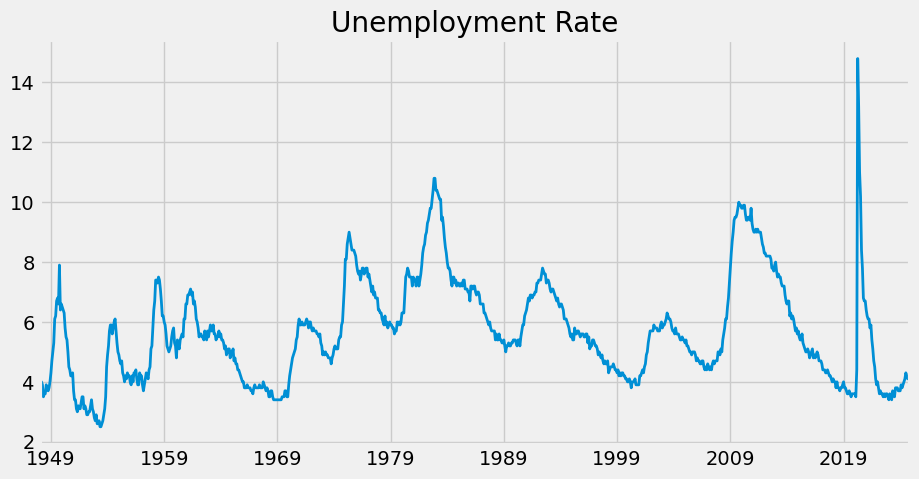

In [24]:
unrate.plot(figsize=(10,5),title='Unemployment Rate',lw=2)

In [101]:
unemp_state = fred.search('unemployment state', filter=('frequency','Monthly'))

In [103]:
unemp_state = unemp_state.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [105]:
unemp_state = unemp_state.loc[unemp_state['title'].str.contains("Unemployment Rate in")]

In [107]:
unemp_state.index

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'MNUR', 'SCUR', 'NMUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'LASMT261982000000003', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'CTUR', 'IDUR', 'LASMT391746000000003', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object', name='series id')

In [109]:
all_results=[]
for i in unemp_state.index:
    results = fred.get_series(i)
    results = results.to_frame(name=i)
    all_results.append(results)

In [113]:
unemp_df = pd.concat(all_results, axis=1)
unemp_df = unemp_df.drop(columns=['LASMT391746000000003','LASMT261982000000003','CMWRUR',	'CSOUUR',	'CNERUR',	'CWSTUR','CNEWUR'])


In [115]:
unemp_df

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,NCUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,MNUR,SCUR,NMUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.8,10.2,5.8,6.1,5.6,6.0,7.4,8.6,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.2,5.8,6.1,5.6,6.0,7.4,8.7,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.1,5.7,6.1,5.6,5.9,7.3,8.7,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,6.3,10.3,8.3,5.6,10.0,5.6,6.0,5.6,5.8,7.2,8.6,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,6.1,10.3,8.1,5.6,9.8,5.5,5.9,5.5,5.7,7.0,8.6,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,5.2,3.7,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.2,3.9,4.0,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,3.1,5.5,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,5.3,3.8,4.8,3.6,4.0,3.4,2.9,2.8,4.8,3.3,4.3,4.1,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,2.3,3.2,5.7,2.7,2.8,2.7,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,5.3,3.8,4.7,3.6,4.0,3.5,2.9,2.9,4.9,3.4,4.5,4.2,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,2.3,3.3,5.7,2.8,2.8,2.7,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,5.3,3.7,4.7,3.6,4.1,3.6,2.9,2.9,5.0,3.4,4.7,4.3,3.3,4.7,3.0,4.0,4.2,5.7,3.3,3.3,3.8,4.6,3.0,3.5,5.4,4.4,4.1,2.9,2.4,3.3,5.7,2.9,2.9,2.7,3.0,3.7,2.5,4.6,3.4,3.2,4.0,2.3,1.9


In [117]:
unemp_df = unemp_df.dropna()
id_to_state = unemp_state['title'].str.replace('Unemployment Rate in ','').to_dict()

In [119]:
id_to_state

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'ILUR': 'Illinois',
 'NCUR': 'North Carolina',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'MNUR': 'Minnesota',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'PRUR': 'Puerto Rico',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'NDUR': 'North Dakota',
 'LASMT261982000000003': 'Detroit-Warren-Dearborn, MI (MSA)',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'C

In [121]:
unemp_df.columns = [id_to_state[c] for c in unemp_df.columns] #list comprehension

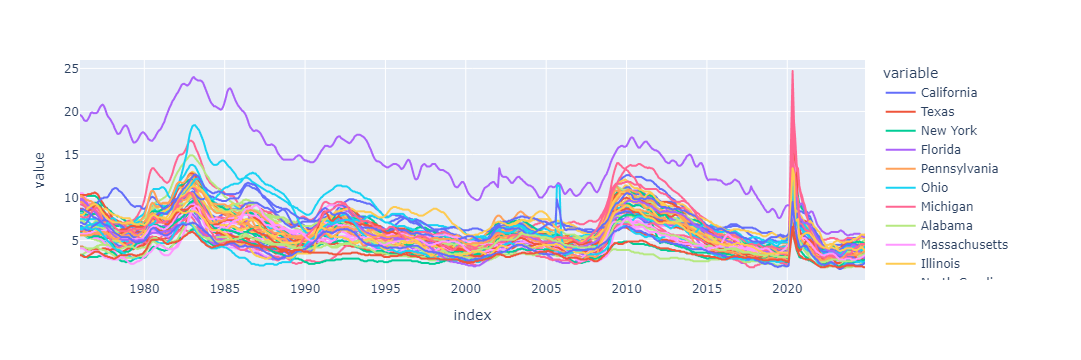

In [123]:
px.line(unemp_df) #plot states unemployment rate

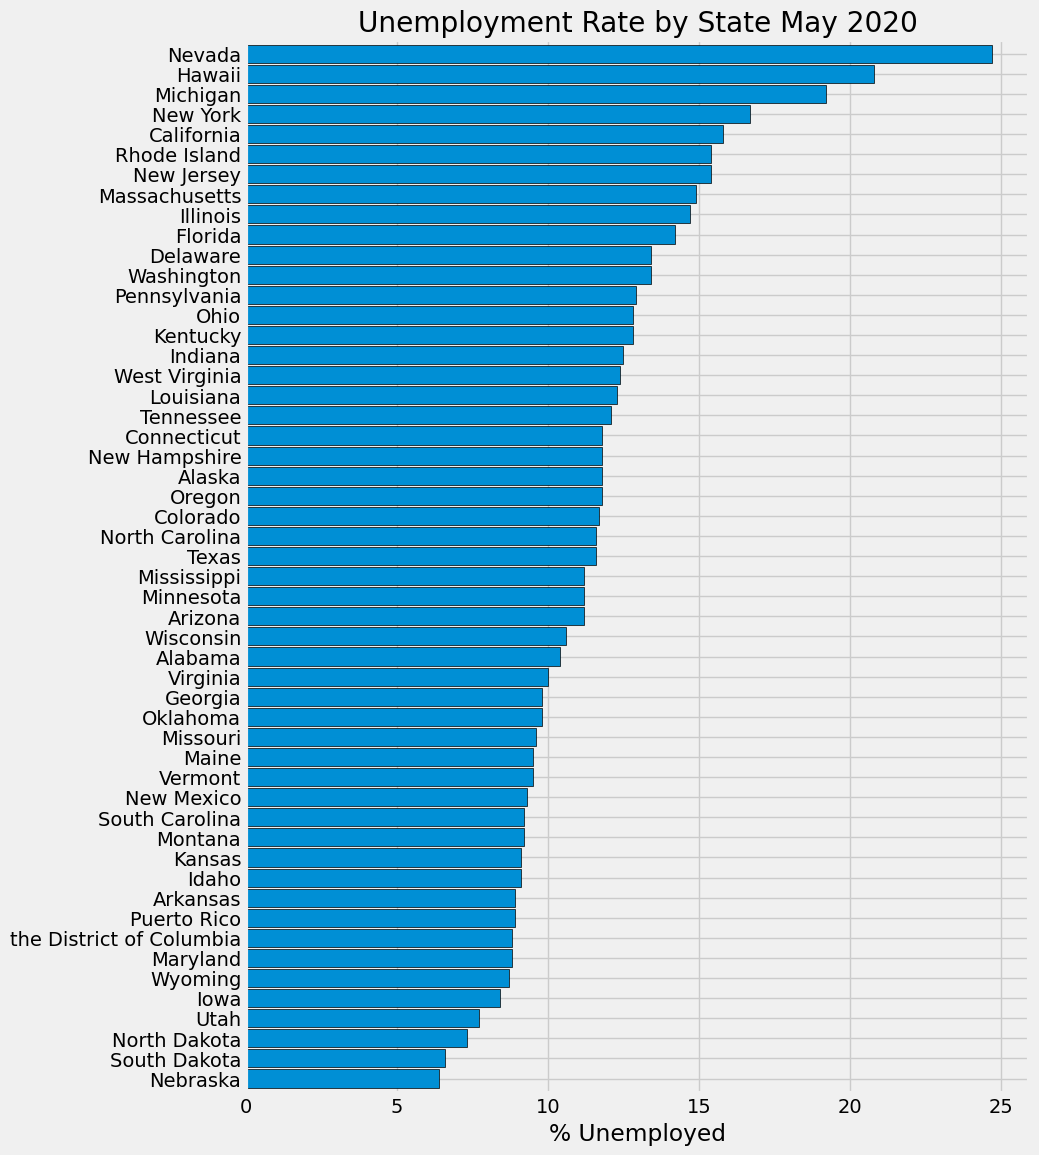

In [125]:
unemp_df_april2020 = unemp_df.loc['May 2020'].T.sort_values('2020-05-01')\
.plot(kind='barh', figsize = (9,13), width=0.9, edgecolor='black', title="Unemployment Rate by State May 2020")

unemp_df_april2020.legend().remove()
unemp_df_april2020.set_xlabel('% Unemployed')
plt.show()

In [45]:
part_state = fred.search('participation rate state', filter=('frequency','Monthly'))
part_state = part_state.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [49]:
part_state = part_state.loc[part_state['title'].str.contains("Labor Force Participation Rate for")]

In [51]:
part_state.shape

(51, 15)

In [63]:
id_to_state_part = part_state['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
id_to_state_part

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [65]:
all_results_part=[]
for i in part_state.index:
    resultspart = fred.get_series(i)
    resultspart = resultspart.to_frame(name=i)
    all_results_part.append(resultspart)

In [66]:
all_results_part = pd.concat(all_results_part,axis=1)

In [67]:
all_results_part.columns = [id_to_state_part[c] for c in all_results_part.columns] #list comprehension

In [143]:
all_results_part
#unemp_df.index

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,62.0,57.5,61.3,62.4,54.2,64.4,58.8,57.6,62.3,65.5,62.9,66.1,67.7,65.5,55.1,59.5,59.8,65.0,60.4,61.8,58.6,57.5,67.9,68.6,66.1,62.5,63.8,64.7,66.4,64.8,63.6,62.3,57.4,62.9,57.9,63.1,68.4,59.7,62.7,62.9,63.0,65.6,65.7,64.4,68.9,67.5,66.1,65.2,72.5,59.8,63.1
2024-08-01,62.1,57.5,61.3,62.3,54.4,64.4,58.6,57.7,62.3,65.5,62.7,66.3,67.7,65.5,55.1,59.5,59.9,65.0,60.3,61.8,58.6,57.6,67.9,68.5,66.0,62.7,63.9,64.8,66.3,64.9,63.5,62.3,57.5,63.1,58.0,63.1,68.3,59.6,62.7,62.9,63.0,65.6,65.7,64.2,68.8,67.5,66.2,65.2,72.3,59.6,63.2
2024-09-01,62.1,57.5,61.2,62.3,54.5,64.5,58.5,57.9,62.4,65.6,62.4,66.4,67.7,65.5,55.1,59.4,60.1,65.0,60.2,61.8,58.6,57.6,67.9,68.4,66.0,63.0,63.9,64.7,66.3,64.9,63.3,62.2,57.5,63.2,58.1,63.1,68.3,59.6,62.7,62.9,63.0,65.7,65.7,64.1,68.8,67.5,66.2,65.1,72.0,59.5,63.2
2024-10-01,62.1,57.6,61.2,62.2,54.7,64.6,58.3,58.1,62.5,65.7,62.2,66.4,67.7,65.6,55.0,59.4,60.2,65.1,60.1,61.7,58.5,57.6,67.9,68.3,66.0,63.2,63.9,64.6,66.2,64.9,63.2,62.1,57.6,63.3,58.1,63.0,68.4,59.7,62.7,62.9,63.0,65.7,65.6,64.1,68.8,67.6,66.4,65.0,71.8,59.3,63.2


KeyError: 'Puerto Rico'

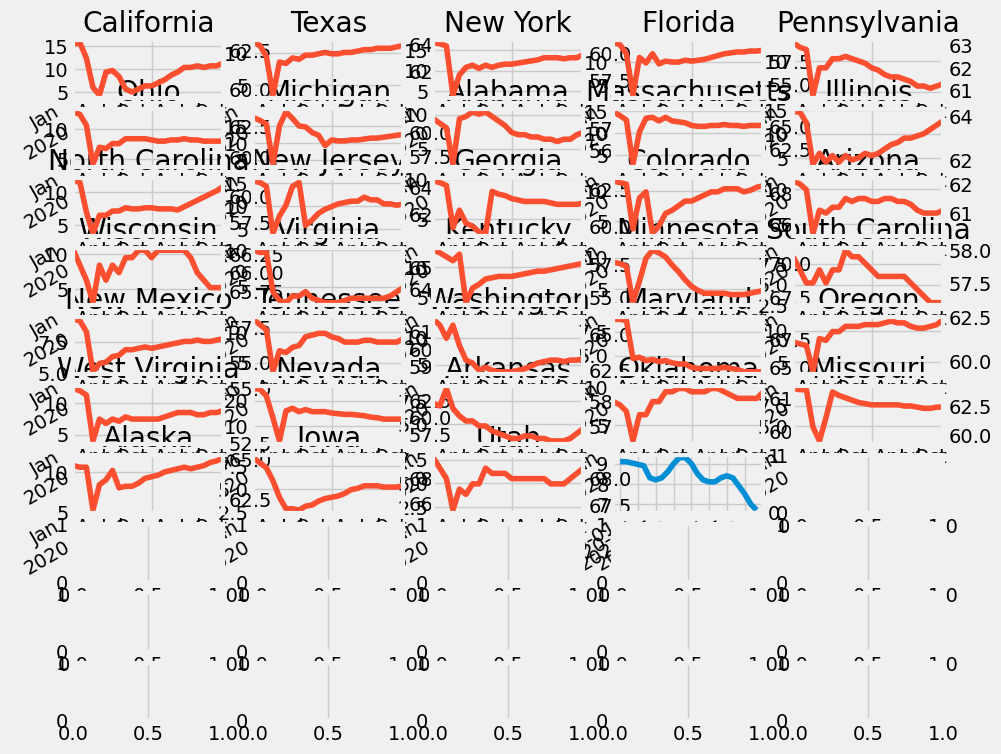

In [165]:
fig, axs = plt.subplots(10, 5, figsize=(10, 10))
axs = axs.flatten()
j = 0
for i in unemp_df.columns:
    ax = axs[j]
    ax2 = ax.twinx()
    unemp_df.loc['2020-01-01':'2021-12-31', i].plot(ax=ax, label='Unemployment')
    all_results_part.loc['2020-01-01':'2021-12-31', i].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    ax.set_title(i)
    j += 1
plt.tight_layout()
plt.show()